# Trends Among Users of Smart Fitness Devices

* **Bellabeat Smart Fitness Project**
* **By: Muktar Arubayi**
* **Date Updated: 20th of June 2021**
* **Data Sources: Mobius and Arooj Anwar Khan**

# Ask. 

**Smart Questions were asked to make Data Driven Decisions**

### Business Task.

* Identify trends among smart fitness device users.
* Apply this trends to Bellabeat product for better user experience.
* Make use of this trend to Improve the marketing strategy of Bellabeat.

### Key Stakeholders

* Urška Sršen: Co founder and Chief Creative Officer.
* Sando Mur: Mathematician and Co founder.
* Marketing Analytics Team.

# Prepare Data for Exloration.

**There are two datasets used in this project.** 

**1. FitBit Smart Fitness Tracker**

**2. Samsung Smart Fitness Tracker**

**1. FitBit Smart Fitness Tracker Data**

* License: CCO: Public Domain, Creative Common. 
* Data-set Owner: Mobius.
* Date Updated: 2020_12_16.
* Thirty eligible Fitbit users consented to the submission of personal tracker data.

* The Data is organized in rows and columns stored both in Wide and Long Format.

* Reliability: This is complete data from a credible source, Mobius.
* Originality: The original collector of the Data is Mobius as generated by respondents to a distributed survey via Amazon Mechanical Turk between 2016_04_12  and  2016_05_12 from Thirty_Three (33)  eligible Fitbit users who gave consent to their data.
* Comprehensiveness: The data has multiple entries and layers from 30 sources. However, the data did not specify sex (male or female) and age range.
* Current: The data is not current, it was collected in 2016. 
* Cited: Yes, the data was collected by Mobius. 
* Licensing: CCO: Public Domain, Creative Common.
* Data Integrity: The users gave consent to the data collection as confirmed under license by Creative Common. Also, personal details of the users are protected.

* The Data has various user trends in Smart Fitness usage that will be analyzed to discover trends that will be useful for Bellabeat Marketing Analytics. 

**2. Samsung Fitness Tracker Data**

* License: CC BY-NC-SA 4.0: Public Domain, Creative Common. 
* Data-set Owners: Arooj Anwar Khan.
* Date Updated: 2018_01_09.
* A sIngle user used the Samsung smart device and consented to the submission of personal tracker data.

* The Data is organized in rows and columns stored in Wide Format.

* Reliability: This is complete data from a credible source, Arooj Anwar Khan.
* Originality: The original collector of the Data is Arooj Anwar Khan.
* Comprehensiveness: The data has multiple entries, however, it did not specify Sex (male or female) and age range.
* Current: I would have preferred more recent data, this was collected in 2017 through 2018. 
* Cited: Yes, the data was collected by Arooj Anwar Khan. 
* Licensing: CCO: Public Domain, Creative Common.
* Data Integrity: The users gave consent to the data collection as confirmed under license by Creative Common. 

* The Data has various user trends in Smart Fitness usage that will be analyzed to discover trends that will be useful for Bellabeat Marketing Analytics.

# Process Data from Dirty to Clean

#### Various Packages are Loaded for the Cleaning of Data

In [209]:
install.packages("tidyverse", repos="http://cran.us.r-project.org")
install.packages("ggplot2",  repos="http://cran.us.r-project.org")
install.packages("tidyr",  repos="http://cran.us.r-project.org")
install.packages("readr",  repos="http://cran.us.r-project.org")
install.packages("dplyr",  repos="http://cran.us.r-project.org")
install.packages("here",  repos="http://cran.us.r-project.org")
install.packages("skimr",  repos="http://cran.us.r-project.org")
install.packages("janitor",  repos="http://cran.us.r-project.org")

library(tidyverse)
library(ggplot2)
library(tidyr)
library(readr)
library(dplyr)
library(here)
library(skimr)
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr", repos = "http://cran.us.r-project.org"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Import the Dataset into R studio for Cleaning.

In [210]:
daily_activities<- read_csv("../input/fitbit-fitness-tracker-data/dailyActivity_merged.csv")
daily_sleep<- read_csv("../input/fitbit-fitness-tracker-data/sleepDay_merged.csv")
daily_activity2<-read.csv("../input/arooj-anwar-khan/25.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  SleepDay = col_character(),
  TotalSleepRecords = col_double(),
  TotalMinutesAsleep = col_double(),
  TotalTimeInBed = col_double()
)




### Clean Dataset (Daily_Activities) From FitBit Fitness Tracker Data.

#### Remove Duplicate Data in Daily Activities

In [211]:
daily_activities<- distinct(daily_activities)

#### Remove Irrelevant Data

In [212]:
daily_activities<- daily_activities %>% 
  select(-TrackerDistance, -LoggedActivitiesDistance, -SedentaryActiveDistance)

#### Name Columns Properly for Consistency

In [213]:
daily_activities <- clean_names(daily_activities)

#### Combine Some Columns in Preparation for Data Exploration

In [214]:
daily_activities<- daily_activities %>% 
  mutate(total_active_minutes= very_active_minutes+fairly_active_minutes+lightly_active_minutes) 
daily_activities<- daily_activities %>% 
  select(-very_active_minutes, -fairly_active_minutes, -lightly_active_minutes)

#### Inspect Daily Activities for changes

In [215]:
colnames(daily_activities)
head(daily_activities)

[1] "id"                         "activity_date"             
 [3] "total_steps"                "total_distance"            
 [5] "very_active_distance"       "moderately_active_distance"
 [7] "light_active_distance"      "sedentary_minutes"         
 [9] "calories"                   "total_active_minutes"

id,activity_date,total_steps,total_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_minutes,calories,total_active_minutes
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,728,1985,366
1503960366,4/13/2016,10735,6.97,1.57,0.69,4.71,776,1797,257
1503960366,4/14/2016,10460,6.74,2.44,0.40,3.91,1218,1776,222
1503960366,4/15/2016,9762,6.28,2.14,1.26,2.83,726,1745,272
1503960366,4/16/2016,12669,8.16,2.71,0.41,5.04,773,1863,267
1503960366,4/17/2016,9705,6.48,3.19,0.78,2.51,539,1728,222


#### Group Distinct User together and get their average activities

In [216]:
daily_activity_summary<- daily_activities %>% 
  group_by(id)%>% 
  summarise(averager_total_steps = mean(total_steps), average_total_distance = mean(total_distance), average_total_active_minutes=mean(total_active_minutes), avearge_sedentary_minutes=mean(sedentary_minutes), average_calories=mean(calories))

#### Rename the Columns without Averages

In [217]:
daily_activities<-daily_activity_summary %>% 
  mutate(total_steps=averager_total_steps, total_distance=average_total_distance, total_active_minutes=average_total_active_minutes, sedentary_minutes=avearge_sedentary_minutes, calories=average_calories)%>%
  select(-averager_total_steps, -average_total_distance, - average_total_active_minutes, -avearge_sedentary_minutes, -average_calories) 
head(daily_activities)

id,total_steps,total_distance,total_active_minutes,sedentary_minutes,calories
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12116.742,7.8096774,277.80645,848.1613,1816.419
1624580081,5743.903,3.9148387,167.96774,1257.7419,1483.355
1644430081,7282.967,5.2953334,209.40000,1161.8667,2811.300
1844505072,2580.065,1.7061290,116.87097,1206.6129,1573.484
1927972279,916.129,0.6345161,40.67742,1317.4194,2172.806
2022484408,11370.645,8.0841935,313.09677,1112.5806,2509.968


### Clean Dataset (Daily_Sleep) From FitBit Fitness Tracker Data.

#### Inspect Dataset

In [218]:
colnames(daily_sleep)
head(daily_sleep)

[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


#### Remove Duplicates, Irrelevant Data and Rename Columns properly.

In [219]:
daily_sleep<- distinct(daily_sleep)%>% 
select(-TotalSleepRecords, -TotalTimeInBed)%>%
clean_names()

#### Average Daily Sleep Hour per User

In [220]:
daily_sleep<- daily_sleep %>% 
  group_by(id) %>% 
  summarise(sleep_hour= mean(total_minutes_asleep/60))
head(daily_sleep)

id,sleep_hour
<dbl>,<dbl>
1503960366,6.004667
1644430081,4.900000
1844505072,10.866667
1927972279,6.950000
2026352035,8.436310
2320127002,1.016667


### Clean Dataset (Daily_Activity 2) From Samsung Fitness Tracker Data.

#### Inspect the Data

In [221]:
head(daily_activity2)

,date,step_count,mood,calories_burned,hours_of_sleep,bool_of_active,weight_kg
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,06/10/2017,5464,200,181,5,0,66
2,07/10/2017,6041,100,197,8,0,66
3,08/10/2017,25,100,0,5,0,66
4,09/10/2017,5461,100,174,4,0,66
5,10/10/2017,6915,200,223,5,500,66
6,11/10/2017,4545,100,149,6,0,66


#### Remove Duplicates, Irrelevant Data

In [222]:
daily_activity2<- distinct (daily_activity2) %>%
  select(-mood, -bool_of_active, -weight_kg)

daily_activity2<- distinct (daily_activity2)
head(daily_activity2)

,date,step_count,calories_burned,hours_of_sleep
,<chr>,<int>,<int>,<int>
1,06/10/2017,5464,181,5
2,07/10/2017,6041,197,8
3,08/10/2017,25,0,5
4,09/10/2017,5461,174,4
5,10/10/2017,6915,223,5
6,11/10/2017,4545,149,6


# Data Exploration for Valuable Insights.

#### Summarize Daily Activities from FitBit

In [223]:
summary(daily_activities)

       id             total_steps      total_distance    total_active_minutes
 Min.   :1.504e+09   Min.   :  916.1   Min.   : 0.6345   Min.   : 40.68      
 1st Qu.:2.347e+09   1st Qu.: 5566.9   1st Qu.: 3.4548   1st Qu.:170.16      
 Median :4.445e+09   Median : 7283.0   Median : 5.2953   Median :244.68      
 Mean   :4.857e+09   Mean   : 7519.3   Mean   : 5.3990   Mean   :225.09      
 3rd Qu.:6.962e+09   3rd Qu.: 9519.7   3rd Qu.: 6.9135   3rd Qu.:286.56      
 Max.   :8.878e+09   Max.   :16040.0   Max.   :13.2129   Max.   :341.15      
 sedentary_minutes    calories   
 Min.   : 662.3    Min.   :1483  
 1st Qu.: 766.4    1st Qu.:1917  
 Median :1077.5    Median :2132  
 Mean   : 999.2    Mean   :2282  
 3rd Qu.:1206.6    3rd Qu.:2600  
 Max.   :1317.4    Max.   :3437  

#### Summarize Daily Sleep from FitBit

In [224]:
summarise(daily_sleep)  
skim(daily_sleep)

1

── Data Summary ────────────────────────
                           Values     
Name                       daily_sleep
Number of rows             24         
Number of columns          2          
_______________________               
Column type frequency:                
  numeric                  2          
________________________              
Group variables            None       

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate          mean            sd
1 id                    0             1 4763820468.   2288232796.  
2 sleep_hour            0             1          6.29          2.28
             p0           p25           p50           p75         p100 hist 
1 1503960366    2340407598.   4501862455    6822461983    8792009665   ▇▅▆▆▃
2          1.02          5.60          6.95          7.49         10.9 ▂▂▃▇▁


#### Summarize Daily Activities from Samsung Tracker

In [225]:
summarise(daily_activity2)  
skim(daily_activity2)

1

── Data Summary ────────────────────────
                           Values         
Name                       daily_activity2
Number of rows             96             
Number of columns          4              
_______________________                   
Column type frequency:                    
  character                1              
  numeric                  3              
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 date                  0             1    10    10     0       96          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate    mean      sd    p0   p25   p50
1 step_count              0             1 2936.   2143.      25 741   2988.
2 calories_burned         0             1   93.4    71.6 

# Share Data Insights through Visualization.

### Visualize the Daily Activity from FitBit Fitness Tracker. 

#### Visualization of Daily Step Counts

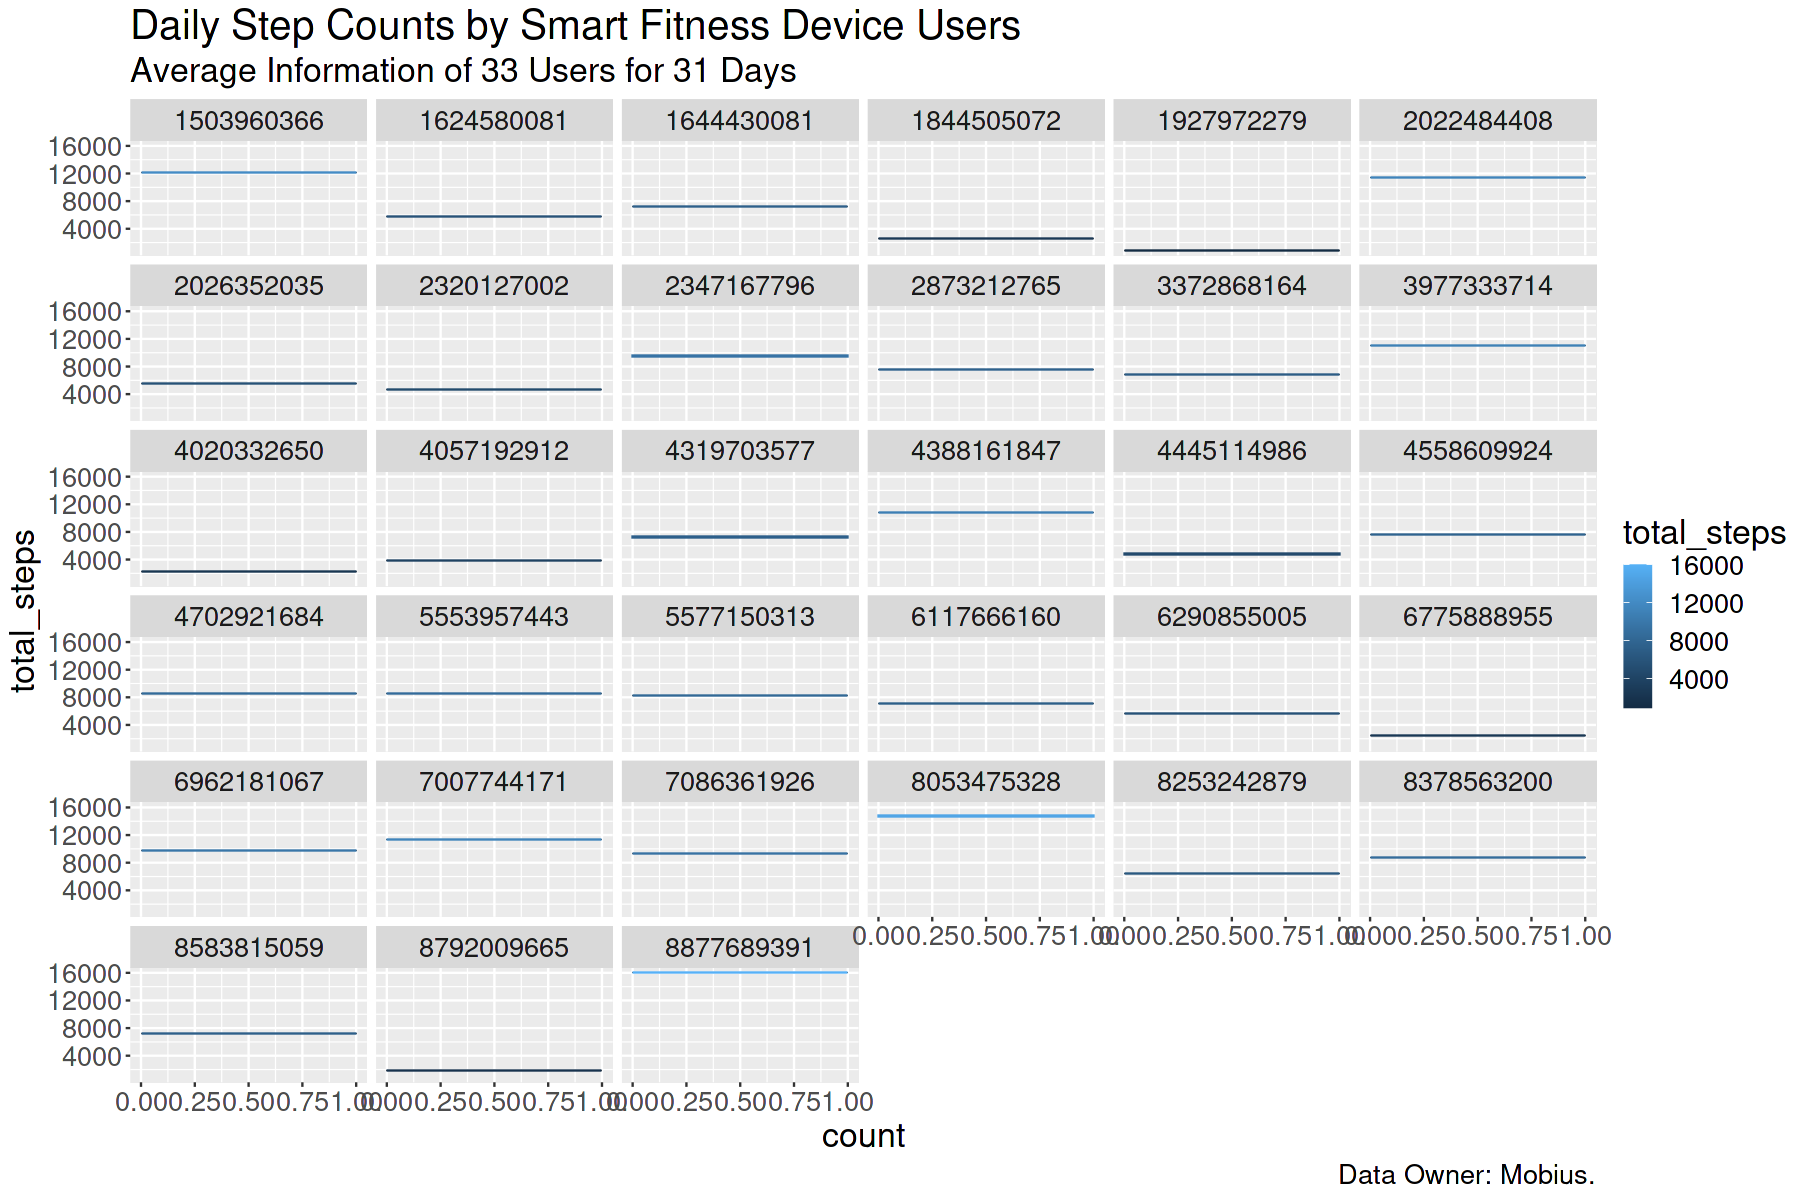

In [226]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(data=daily_activities)+
geom_bar(mapping = aes(y=total_steps, color=total_steps))+
  facet_wrap(~id)+
  labs(title="Daily Step Counts by Smart Fitness Device Users", subtitle = "Average Information of 33 Users for 31 Days", caption = "Data Owner: Mobius.")+
theme(text = element_text(size = 20), element_line(size = 0.5))

* **Only 7 out of 33 users completed at least 10000 steps daily**
* **The average daily steps completed by 33 users is 7519**

#### Visualization of Total Distance

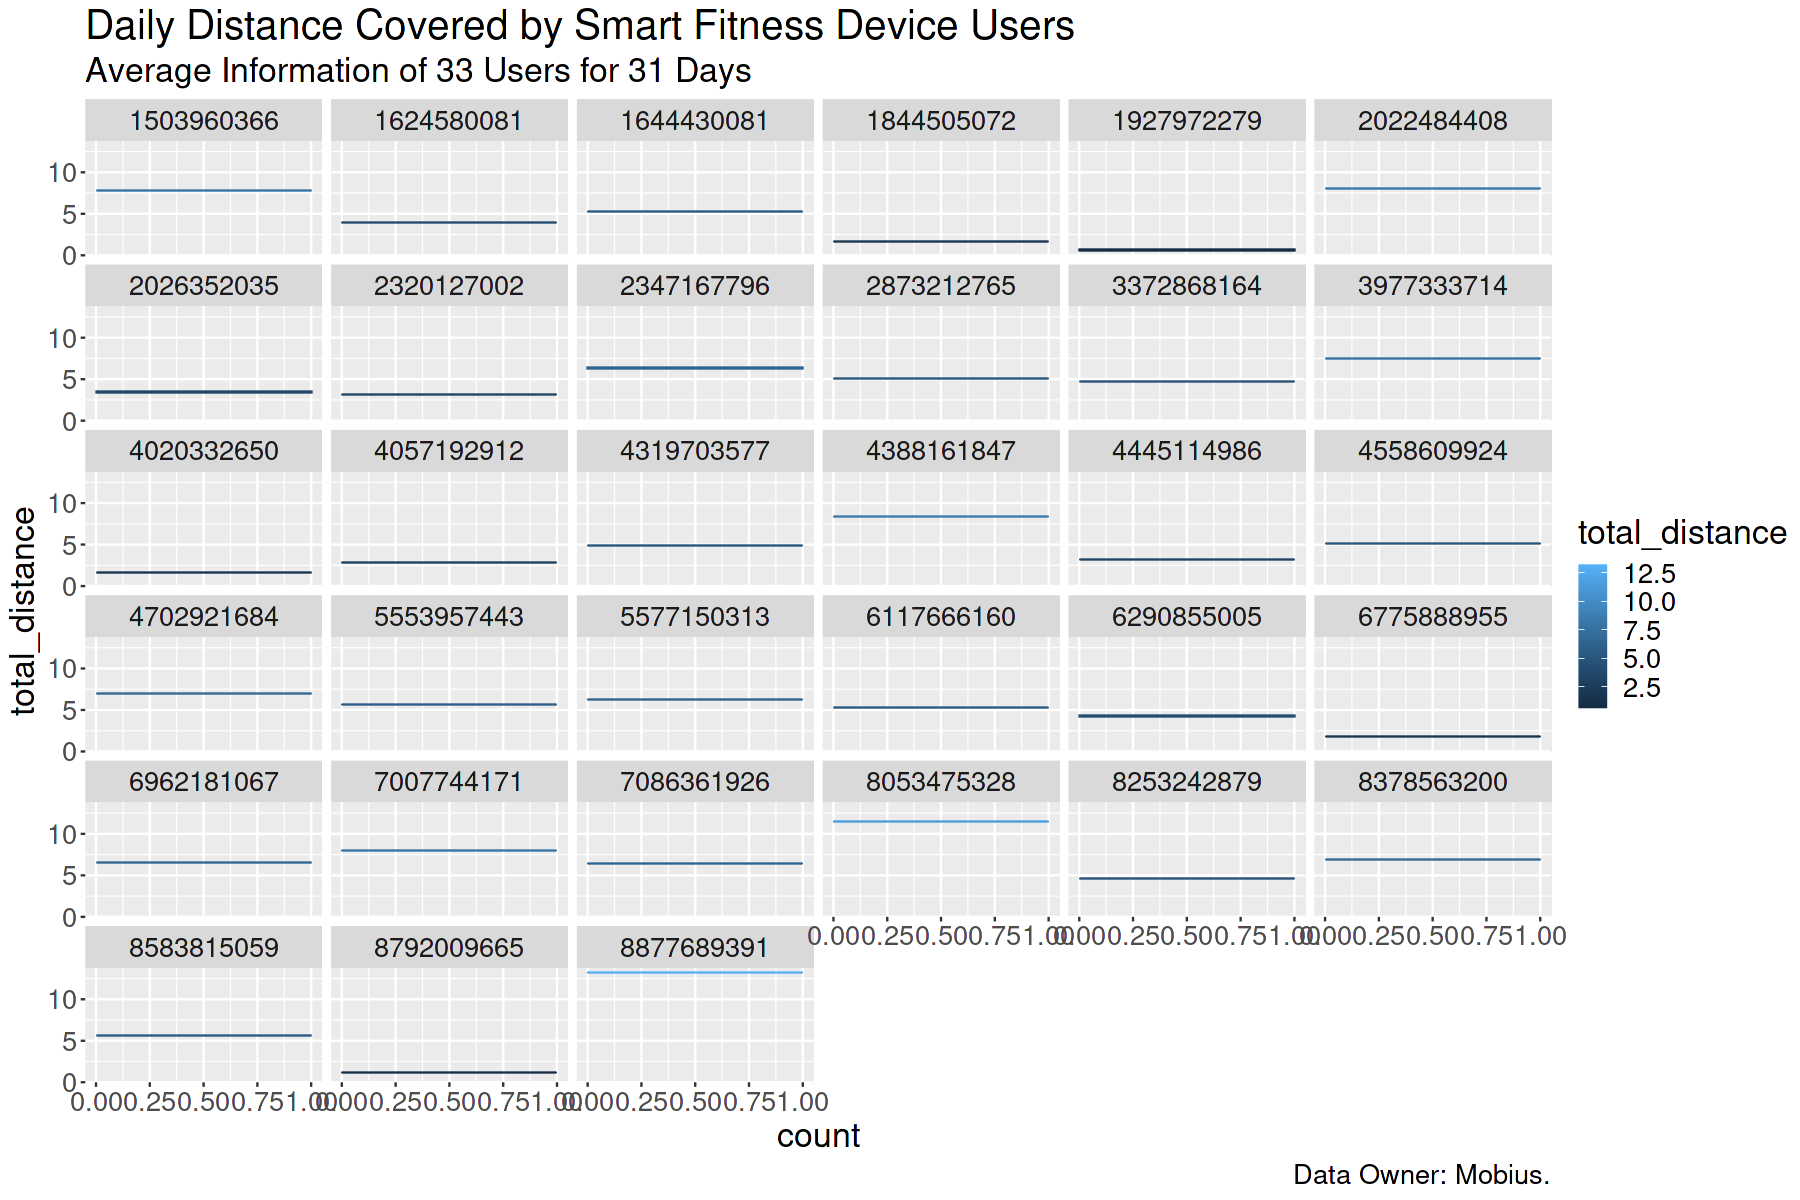

In [227]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(data=daily_activities)+
  geom_bar(mapping = aes(y=total_distance, color=total_distance))+
  facet_wrap(~id)+
  labs(title="Daily Distance Covered by Smart Fitness Device Users", subtitle = "Average Information of 33 Users for 31 Days", caption = "Data Owner: Mobius.")+
theme(text = element_text(size = 20), element_line(size = 0.5))

* **Only 5 out of 33 users completed at least 8KM active distance daily**
* **The average daily active distance completed by 33 users is 5.32KM**

#### Visualization of Daily Sleep

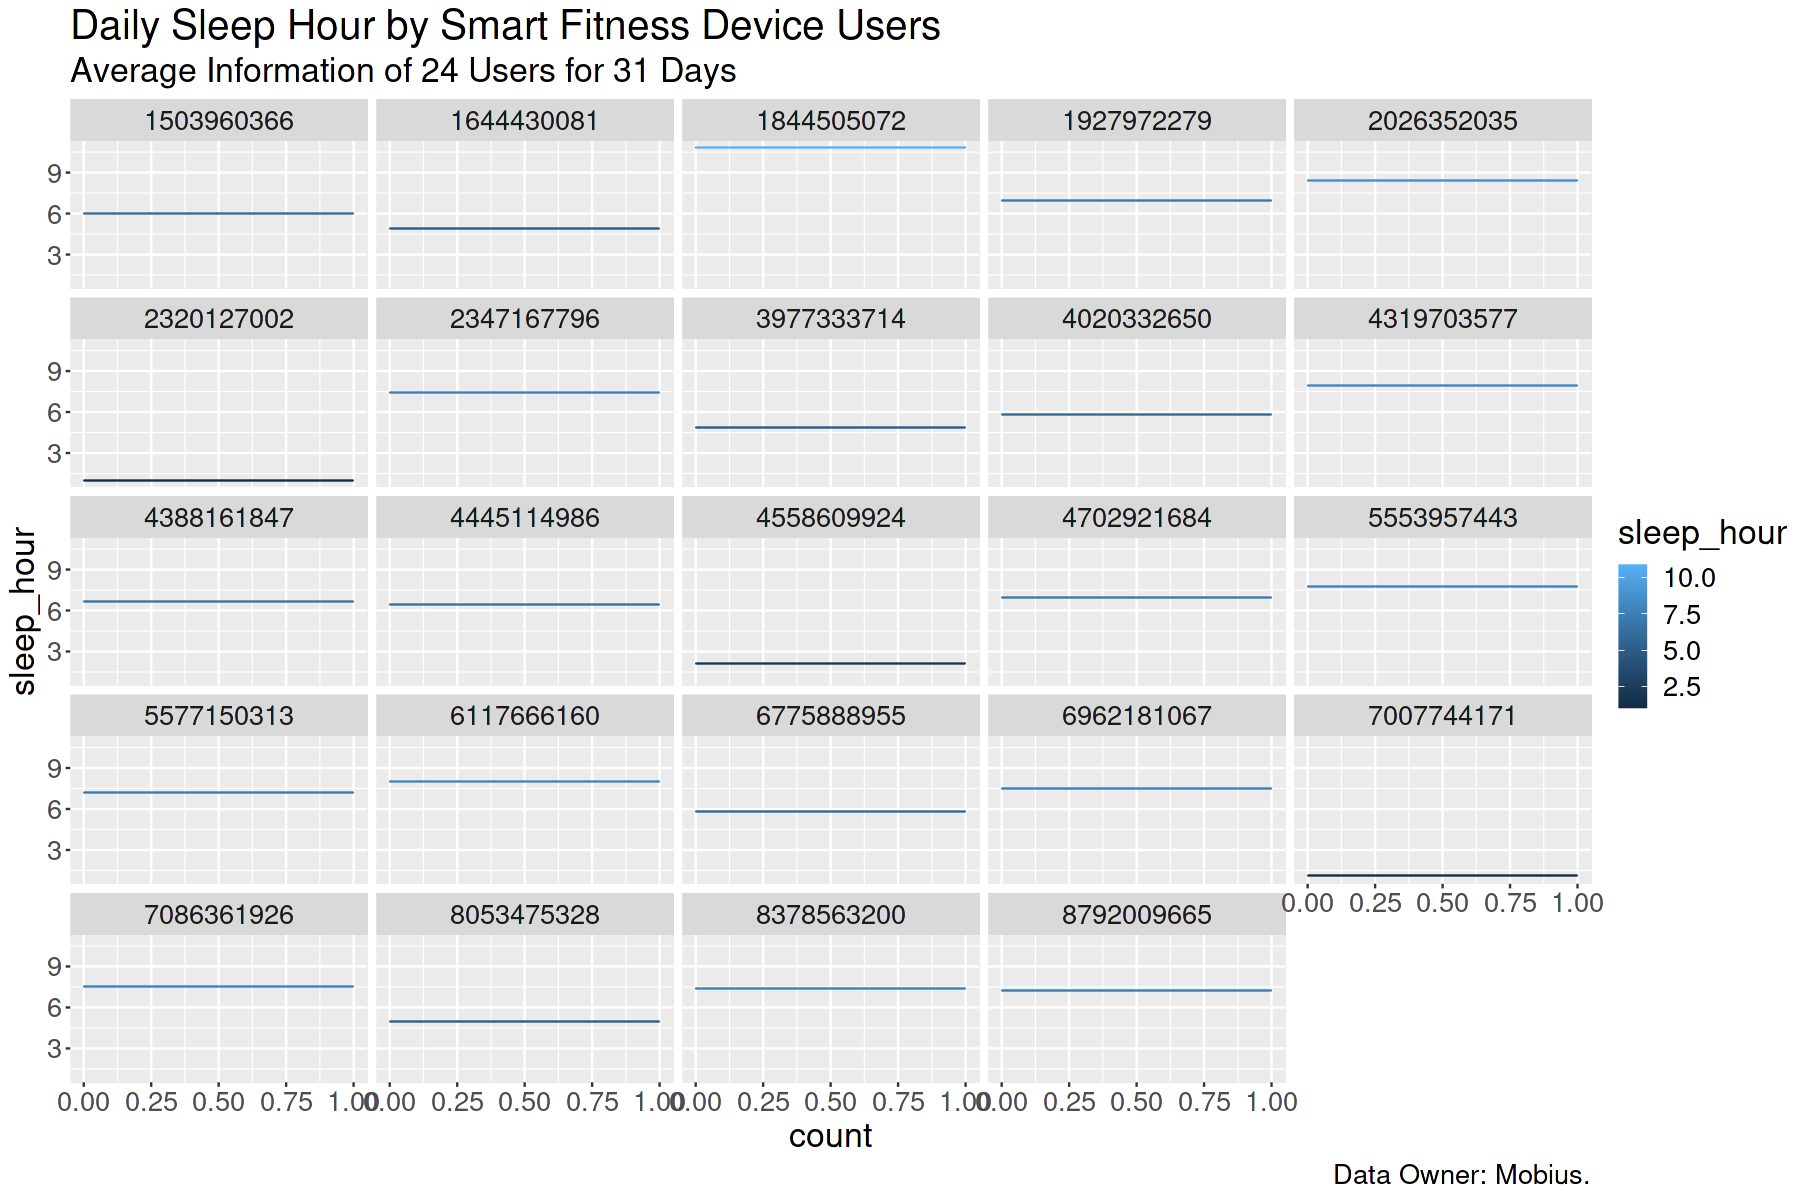

In [228]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(data=daily_sleep)+
  geom_bar(mapping = aes(y=sleep_hour, color=sleep_hour))+
  facet_wrap(~id)+
  labs(title="Daily Sleep Hour by Smart Fitness Device Users", subtitle = "Average Information of 24 Users for 31 Days", caption = "Data Owner: Mobius.")+
theme(text = element_text(size = 20), element_line(size = 0.5))

* **10 out of 24 users sleep less than 7 hours daily**
* **The average daily sleep time of the 24 users is 6 hours**

### Visualize the Daily Activity from Samsung Fitness Tracker. 

#### Visualize the Relationship Between Step Count and Calories Burned

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



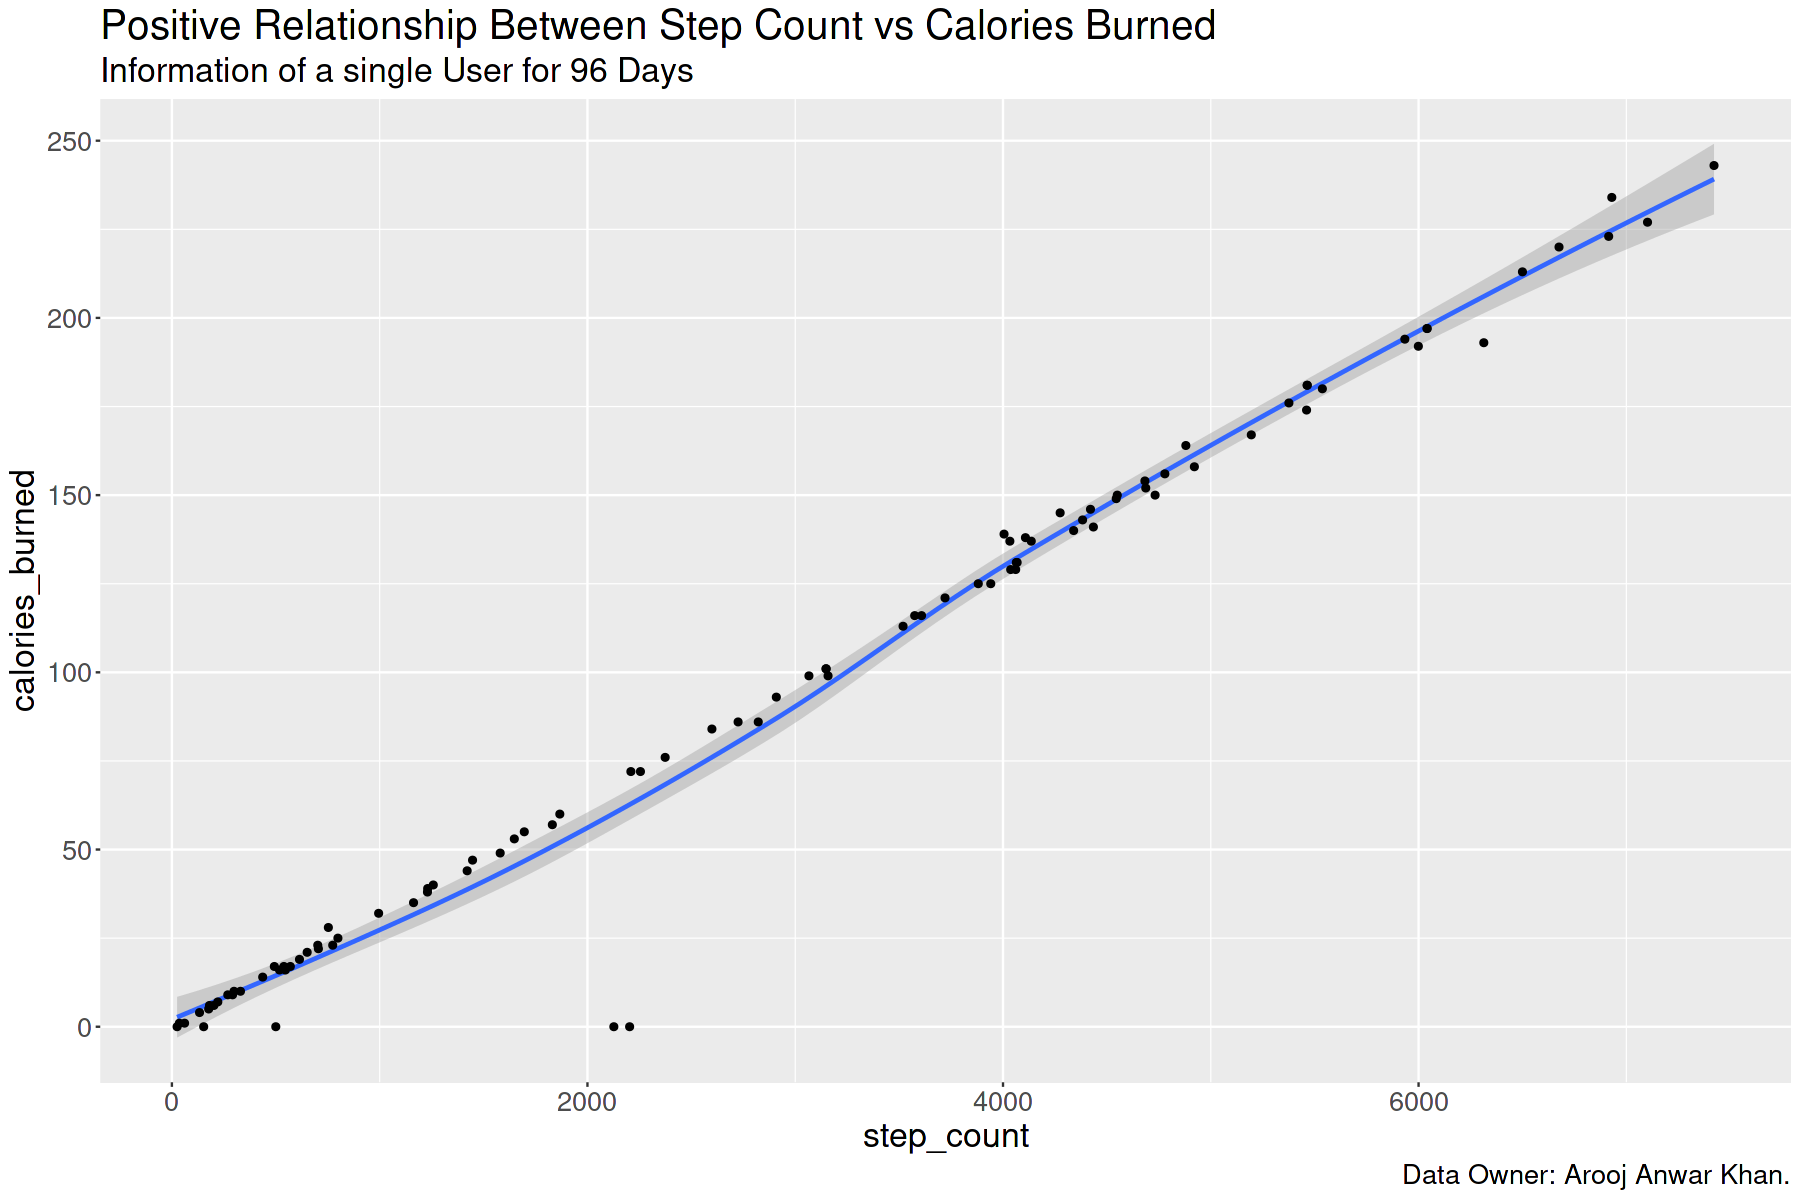

In [229]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(data=daily_activity2)+
  geom_smooth(mapping = aes(x=step_count, y=calories_burned))+
  geom_point(mapping = aes(x=step_count, y=calories_burned))+
  labs(title="Positive Relationship Between Step Count vs Calories Burned", subtitle = "Information of a single User for 96 Days", caption = "Data Owner: Arooj Anwar Khan.")+
theme(text = element_text(size = 20), element_line(size = 0.5))

* **A positive Correlation was seen between step counts and calories burned**
* **The device monitored the activities of a single user for 96 days**

#### Exporting Data as CSV File for More Visualization.

In [230]:
write.table(daily_activities, "daily_activities.csv", row.names = F, sep = ",")

write.table(daily_activity2, "daily_activity2.csv", row.names = F, sep = ",")

write.table(daily_sleep, "daily_sleep.csv", row.names = F, sep = ",")

# Conclusion.

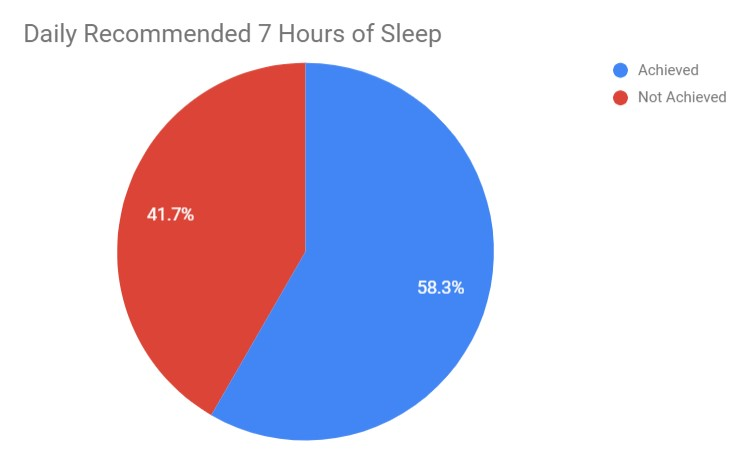
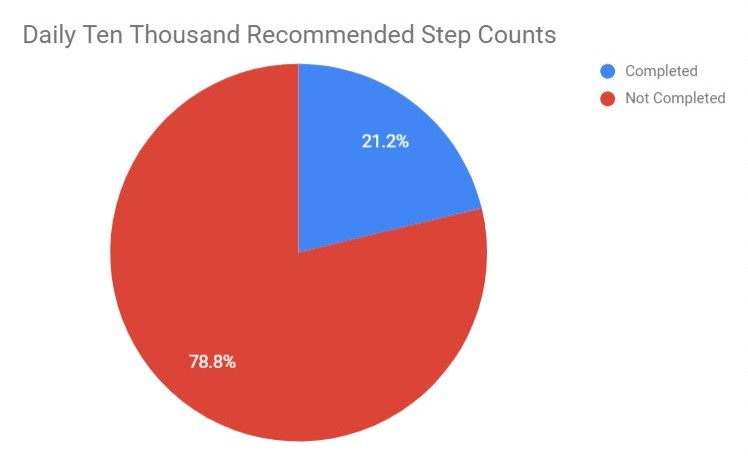
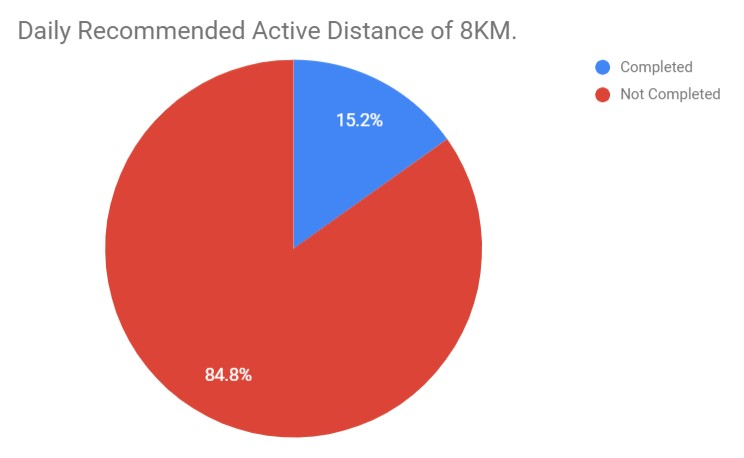

* **42% of total users did not achieve the 7-9 hours of recommended daily sleep by centers for disease control and prevention (CDC), March 2017**

* **79% of users did not meet the 10000 daily step counts as prescribed by centers for disease control and prevention (CDC), March 2020**

* **85% of users did not meet the 8KM daily active distance as recommended d by centers for disease control and prevention (CDC), March 2020 for healthy adult**

* **A positive Relationship seem to exist between daily step counts and calories burned but more data needs to be analyzed to confirm this relationship**

# Recommendation.

* **Introduce Promotional Programs to improve sleeping habits among users of Bellabeat Fitness device. Give awards to adults who complete 7 – 9 hours of daily sleep**
* **Use a combination of promotional programs and alerts to improve step counts and active distance among adult users** 
* **Study more relationship between step counts and calories burned. This can also be a great area to improve user experience**